In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("LC_DS.csv")

In [3]:
# Remove duplicates 
before = dataset.shape
dataset = dataset.drop_duplicates()
after = dataset.shape

print("Before:", before)
print("After :", after)

Before: (890000, 17)
After : (890000, 17)


In [4]:
# Normalize text
dataset["gender"] = dataset["gender"].str.lower().str.strip()
dataset["smoking_status"] = dataset["smoking_status"].str.lower().str.strip()
dataset[["gender", "smoking_status"]].head()

,gender,smoking_status
0,male,passive smoker
1,female,passive smoker
2,female,former smoker
3,female,passive smoker
4,male,passive smoker


In [5]:
# Convert yes/no to 1/0
dataset["family_history"] = dataset["family_history"].replace({"Yes": 1, "No": 0})
dataset["family_history"] = pd.to_numeric(dataset["family_history"], errors="coerce")
dataset["family_history"].value_counts()

C:\Users\3mmi9\AppData\Local\Temp\ipykernel_25340\3169185852.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["family_history"] = dataset["family_history"].replace({"Yes": 1, "No": 0})


family_history
0    445181
1    444819
Name: count, dtype: int64

In [6]:
# Check for missing values
dataset.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [7]:
# Fix data types (dates)
dataset["diagnosis_date"] = pd.to_datetime(dataset["diagnosis_date"])
dataset["end_treatment_date"] = pd.to_datetime(dataset["end_treatment_date"])
dataset[["diagnosis_date", "end_treatment_date"]].dtypes

diagnosis_date        datetime64[ns]
end_treatment_date    datetime64[ns]
dtype: object

In [8]:
# Filter by date 
dataset = dataset[dataset["diagnosis_date"] >= "2015-01-01"]
dataset["diagnosis_date"].min(), dataset["diagnosis_date"].max(), dataset.shape

(Timestamp('2015-01-01 00:00:00'),
 Timestamp('2024-05-30 00:00:00'),
 (838231, 17))

In [9]:
dataset.to_csv("LC_DS_cleaned.csv", index=False)

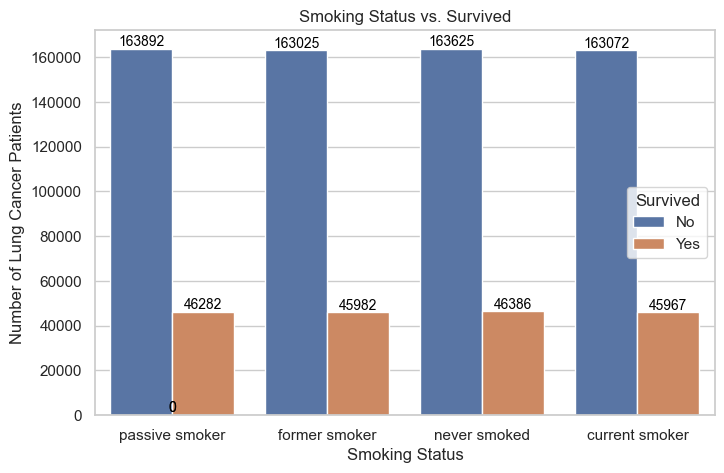

In [ ]:
# Create a bar chart: Smoking Status vs. Survived
def smoking_bar_chart():
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=dataset, x="smoking_status", hue="survived")
    plt.title("Smoking Status vs. Survived")
    plt.xlabel("Smoking Status")
    plt.ylabel("Number of Lung Cancer Patients")
    plt.legend(title="Survived", labels=["No", "Yes"])
    
    # Add counts on top of bars
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
    plt.show()
    # print(pd.crosstab(dataset['smoking_status'], dataset['survived']))

smoking_bar_chart()

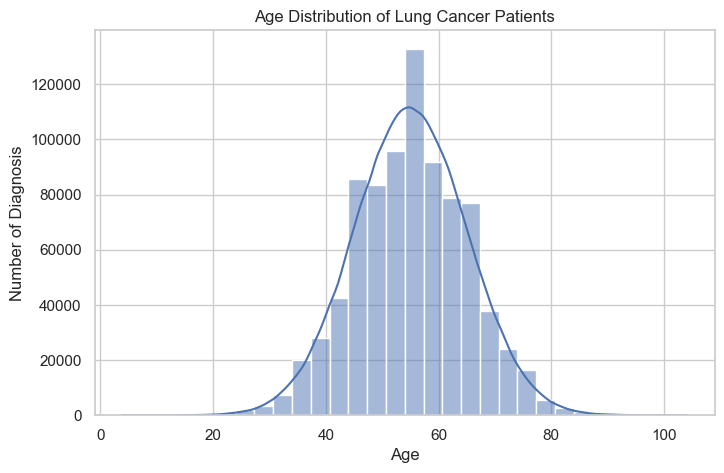

In [35]:
# Create a histogram: Age Distribution of Lung Cancer Patients

def age_histogram():
    plt.figure(figsize=(8,5))
    sns.histplot(dataset["age"], bins=30, kde=True)
    plt.title("Age Distribution of Lung Cancer Patients")
    plt.xlabel("Age")
    plt.ylabel("Number of Diagnosis")
    plt.show()

age_histogram()
